In [2]:
import matplotlib
import matplotlib.pyplot as plt
import random
from scipy.stats import poisson
import numpy as np
%matplotlib inline

In [3]:
# number of rows and columns in the SiPM
n_row = 120
n_col = 120
n_cell = n_row*n_col

# probability to hit a cell in the SiPM
p_cell = 1./ n_cell

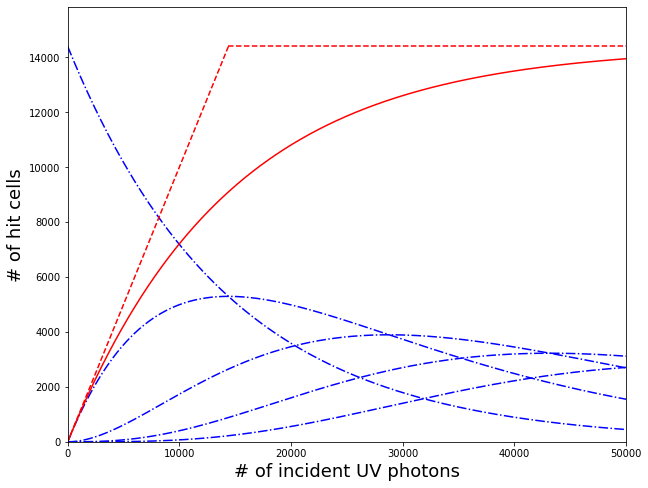

In [5]:
# number of UV photons hitting a sensor
nuv = np.arange(0.,100000.,100)

# calculate the expected number of n=0,1,2,... diodes 
nn= []
for i in range(5):
    nn.append(poisson.pmf(i,nuv*p_cell)*n_cell)
    
signal = (1 - poisson.pmf(0,nuv*p_cell))*n_cell

# start drawing the figure
plt.figure(figsize=(10,8))

# different n-hit distributions
for i in range(5):
    plt.plot(nuv,nn[i],color='blue',linestyle='-.')
    
# signal   
plt.plot(nuv,signal,color='red')
# perfect linear response 
plt.plot([0,n_cell],[0,n_cell],color='red',linestyle='--')
plt.plot([n_cell,10*n_cell],[n_cell,n_cell],color='red',linestyle='--')

plt.xlim([0,50000])
plt.ylim([0,n_cell*1.1])
plt.xlabel("# of incident UV photons",fontsize=18)
plt.ylabel("# of hit cells",fontsize=18)
plt.savefig('sipm_occupancy.pdf')